In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Literal
from math import sqrt

In [15]:
class QuadraticEquationState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    discriminant:float
    results:str

In [16]:
graph=StateGraph(QuadraticEquationState)

def gen_equation(state:QuadraticEquationState)->QuadraticEquationState:
    equation=f"{state['a']}x^2+{state['b']}x+{state['c']}"
    return {
        "equation":equation
    }
def calculate_discriminant(state:QuadraticEquationState)->QuadraticEquationState:
    discriminant=(state['b']**2)-(4*state['a']*state['c'])
    return {
        "discriminant":discriminant
    }
def repeated_roots(state:QuadraticEquationState)->QuadraticEquationState:
    root=(-state['b'])/(2*state['a'])
    return {
        "results":f"The repeated root of Equation is {root}"
    }
def two_roots(state:QuadraticEquationState)->QuadraticEquationState:
    r1 = ((-state["b"]) + sqrt((state['b']**2) - (4 * state['a'] * state['c']))) / (2 * state['a'])
    r2 = ((-state["b"]) - sqrt((state['b']**2) - (4 * state['a'] * state['c']))) / (2 * state['a'])

    return {
        "results":f"The root of Equation are {r1} and {r2}"
    }
def no_roots(state:QuadraticEquationState)->QuadraticEquationState:
    return {
        "results":f"There is no root for this Equation"
    }

def discriminant_condition(state:QuadraticEquationState)->Literal["repeated_roots","two_roots","no_roots"]:
    if state['discriminant']>0:
        return "two_roots"
    elif state['discriminant']==0:
        return "repeated_roots"
    else:
        return "no_roots"

In [17]:
graph.add_node("gen_equation",gen_equation)
graph.add_node("calculate_discriminant",calculate_discriminant)
graph.add_node("repeated_roots",repeated_roots)
graph.add_node("two_roots",two_roots)
graph.add_node("no_roots",no_roots)


In [18]:
graph.add_edge(START,"gen_equation")
graph.add_edge("gen_equation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",discriminant_condition)
graph.add_edge("repeated_roots",END)
graph.add_edge("two_roots",END)
graph.add_edge("no_roots",END)

In [19]:
workflow=graph.compile()

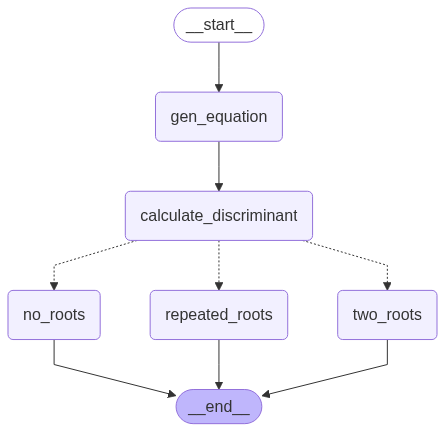

In [20]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [21]:
initial_state={
    "a":1,
    "b":-5,
    "c":6
}
final_state=workflow.invoke(initial_state)

In [22]:
print(final_state)

{'a': 1, 'b': -5, 'c': 6, 'equation': '1x^2+-5x+6', 'discriminant': 1, 'results': 'The root of Equation are 3.0 and 2.0'}
